In [5]:
print("import libraries")
print("...")
#to disable notebook warnings
import warnings
warnings.filterwarnings('ignore')

# data processing
import pandas as pd

# linear algebra
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# data standardization
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

# train test split
from sklearn.model_selection import train_test_split

# ML
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
#from sklearn.svm import SVR

print("...")
print("Done")
print("Libraries imported")

import libraries
...
...
Done
Libraries imported


In [6]:
def read_data(path):
    data = pd.read_csv(path)
    return data

df = read_data('./stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### dependent & independent variables

In [7]:
X = df.drop(columns=['math_score'],axis=1)
y = df['math_score']
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [8]:
## Create column transformer with 3 types of transformers

num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

numeric_transformer = StandardScaler()
one_encoder = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", one_encoder, cat_features),
        ("StandardScaler", numeric_transformer,num_features)
    ]
)

X=preprocessor.fit_transform(X)
X.shape

(1000, 19)

In [9]:
#separate dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=20)
X_train.shape, X_test.shape

((800, 19), (200, 19))

In [10]:
### Evaluation function to give all metrics after model training

def evaluate_model(true_val, pred_val):
    mae = mean_absolute_error(true_val,pred_val)
    mse = mean_squared_error(true_val,pred_val)
    rmse = np.sqrt(mean_squared_error(true_val,pred_val))
    r2_square = r2_score(true_val,pred_val)
    return mse, rmse, r2_square

In [27]:
models ={
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "KNN": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random forest regressor" : RandomForestRegressor(),
    "XDBoostregressor": XGBRegressor(),
    "CatBoostregressor": CatBoostRegressor(verbose=False),
    "Adaboostregressor": AdaBoostRegressor()
}

model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)

    #make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate train and test dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model performance of training set")
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))
    
    print("--------------------------")

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))    
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')

Linear Regression
Model performance of training set
- Root Mean Squared Error: 5.2761
- Mean Absolute Error: 27.8372
- R2 Score: 0.8796
--------------------------
Model performance for Test set
- Root Mean Squared Error: 5.5396
- Mean Absolute Error: 30.6868
- R2 Score: 0.8625


Lasso
Model performance of training set
- Root Mean Squared Error: 6.4936
- Mean Absolute Error: 42.1670
- R2 Score: 0.8177
--------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5424
- Mean Absolute Error: 42.8026
- R2 Score: 0.8082


Ridge
Model performance of training set
- Root Mean Squared Error: 5.2763
- Mean Absolute Error: 27.8396
- R2 Score: 0.8796
--------------------------
Model performance for Test set
- Root Mean Squared Error: 5.5410
- Mean Absolute Error: 30.7031
- R2 Score: 0.8625


KNN
Model performance of training set
- Root Mean Squared Error: 5.7061
- Mean Absolute Error: 32.5601
- R2 Score: 0.8592
--------------------------
Model performance for Test set
- Ro

### Results

In [34]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model_Name','R2_score']).sort_values(by=["R2_score"],ascending=False)

,Model_Name,R2_score
0,Linear Regression,0.862527
2,Ridge,0.862454
7,CatBoostregressor,0.827214
5,Random forest regressor,0.809633
1,Lasso,0.808249
8,Adaboostregressor,0.791007
6,XDBoostregressor,0.786528
3,KNN,0.774602
4,Decision Tree,0.678434


#### We can use linear regression

In [35]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 86.25


#### Plot

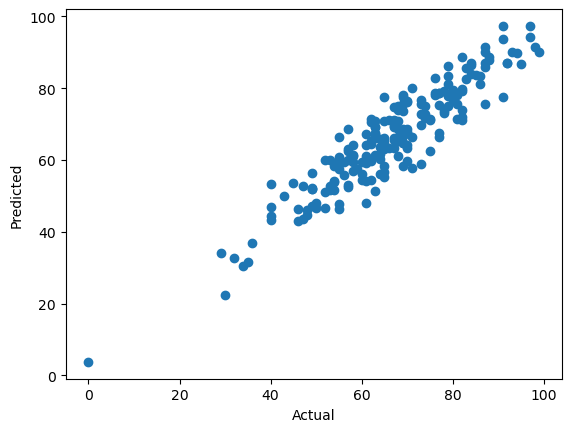

In [37]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

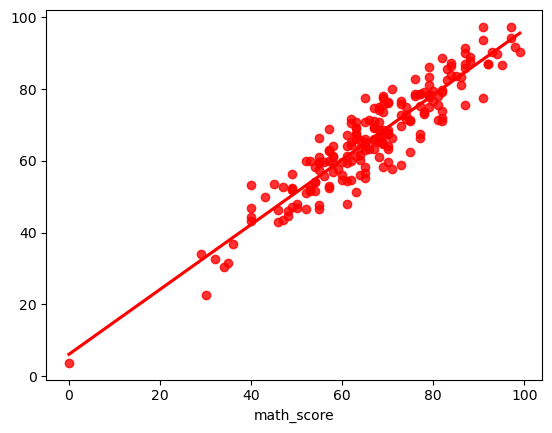

In [38]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [40]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df.head(10)

,Actual Value,Predicted Value,Difference
890,86,83.482779,2.517221
694,49,51.902578,-2.902578
798,69,67.336689,1.663311
147,73,69.622232,3.377768
858,52,50.993922,1.006078
446,69,64.749972,4.250028
634,84,87.125793,-3.125793
127,65,77.527852,-12.527852
812,54,54.066581,-0.066581
438,70,59.680969,10.319031
